# Welcome to Team Insert_funny_name_here's Object Detection Demonstration Notebook

In [1]:
%matplotlib inline

In [2]:
while True:
    try:
        train = int(input("Would you like to train the network.\nEnter 1 for yes and 2 for no\n"))
        assert train == 1 or train == 2
        break
    except:
        print("Please input 1 or 2")

Would you like to train the network.
Enter 1 for yes and 2 for no

Please input 1 or 2
Would you like to train the network.
Enter 1 for yes and 2 for no
1


In [4]:
if train == 1:
    train = True
else:
    train = False

In [ ]:
if train == True:
    from CONFIG import *

    import torch

    import os

    import torch.nn as nn

    from torch.utils import model_zoo

    from Our_VGG16 import vgg

    from yoloLoss import yoloLoss

    from torch.nn.init import xavier_uniform

    import time

    net = vgg(False)

    if net.batch_norm:
        net.load_state_dict(model_zoo.load_url(vgg16_batch_norm_url))
    else:
        net.load_state_dict(model_zoo.load_url(vgg16_url))


    net.classifier = nn.Sequential(
                        nn.Linear(512*7*7,4096),
                        nn.ReLU(True),
                        nn.Dropout(),
                        nn.Linear(4096,1470))

    if torch.cuda.is_available():
        net.cuda()

    net.train()

    optimizer = torch.optim.Adam(net.parameters(),lr = learning_rate,weight_decay=weight_decay)

    optimizer2 = torch.optim.SGD(net.parameters(), lr=0.00001, momentum=0.9, weight_decay=5e-4)

    train_imgs_dir = 'VOC_Datasets/VOC_2012_training/VOC2012/JPEGImages/'
    train_ann_dir = 'voc2012train.txt'
    val_imgs_dir = 'VOC_Datasets/VOC_2007_testing/VOCdevkit/VOC2007/JPEGImages/'
    val_ann_dir = 'voc2007test.txt'

    from dataset import yoloDataset
    import torchvision.transforms as transforms

    img_names = os.listdir(train_imgs_dir)
    train_dataset = yoloDataset(train_imgs_dir,train_ann_dir,train = True, transform = [transforms.ToTensor()])
    val_dataset = yoloDataset(val_imgs_dir,val_ann_dir,train = False, transform = [transforms.ToTensor()])

    from torch.utils.data import DataLoader

    train_batches = DataLoader(train_dataset,batch_size = batch_size, shuffle = False, num_workers = 2)
    val_batches = DataLoader(val_dataset, batch_size = batch_size, shuffle = False, num_workers = 2)

    len(train_dataset)

    len(val_dataset)

    print len(train_batches), len(val_batches)

    from torch.autograd import Variable

    yoloLossCriterion = yoloLoss(7,2,5,0.5)

    train_loss_list = []
    val_loss_list = []

In [ ]:
if train == True:    
    def batch_process(mode,j):
        loss_list = []
        time_list = []
        total_time = 0
        if mode == 'train':
            print("Training")
            net.train()
            batches = train_batches
        else:
            net.eval()
            batches = val_batches
        for (images,targets) in batches:
            start = time.time()
            images,targets = Variable(images),Variable(targets)
            if torch.cuda.is_available():
                images = images.cuda()
                targets = targets.cuda()
            predictions = net(images)
            loss = yoloLossCriterion(predictions,targets)
        #         print(loss.data[0])

            loss_list.append(loss.data[0])
            if mode == 'train':
                if loss.data[0] < lowest_training_loss:
                    torch.save(net.state_dict(),'training_weights.pth')
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
            else:
                if loss.data[0] < lowest_val_loss:
                    torch.save(net.state_dict(),'validation_weights.pth')                
            j += 1
            end = time.time()
            print "Epoch : ", i+1 , "/", num_epochs,"\n"
            print "Batch : ",j, "/",len(batches)," : Loss is :", loss.data[0]
            print "The time for this batch was :",(end - start)," seconds"
            time_list.append(end - start)
            total_time += time_list[-1]
        return loss_list,time_list,total_time

In [ ]:
if train == True:   
    # if 'validation_weights.pth' in os.listdir('./'):
    #     net.load_state_dict(torch.load('validation_weights.pth'))
    lowest_training_loss = float("inf")
    lowest_val_loss = float("inf")

    i = 0
    training_loss_list = []
    val_loss_list = []
    while i < 1:
        j = 0
        training_loss_list,time_list,total_time = batch_process('train',j)

    #     val_loss_list,time_list,total_time = batch_process('train',j)
        i += 1

Here are the images on which we will run our Object Detector

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython import display
import time

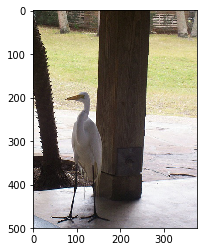

In [8]:
img = mpimg.imread("Demo_image01.jpg")
plt.close()
plt.imshow(img)    

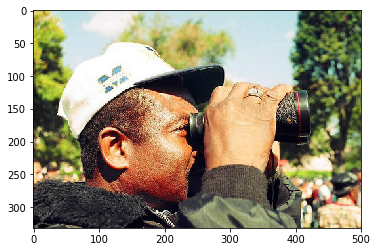

In [9]:
img = mpimg.imread("Demo_image02.jpg")
plt.close()
plt.imshow(img)

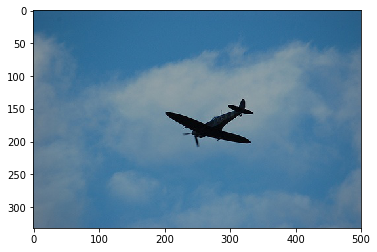

In [10]:
img = mpimg.imread("Demo_image03.jpg")
plt.close()
plt.imshow(img)

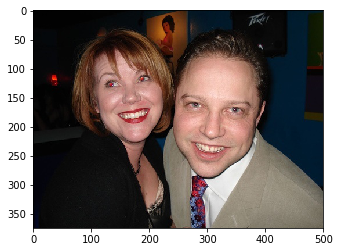

In [11]:
img = mpimg.imread("Demo_image04.jpg")
plt.close()
plt.imshow(img)

In [2]:
model = vgg16(pretrained=False)
model.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, 1470),
        )
model.load_state_dict(torch.load('best.pth'))
model.eval()
model.cuda()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
    

In [24]:
import cv2
from predict import *
for i in range(1,5):
    image = cv2.imread("Demo_image0"+str(i)+".jpg")
    image_name = "Demo_image0"+str(i)+".jpg"
    result = predict_gpu(model,image_name)
    for left_up,right_bottom,class_name,_,prob in result:
        cv2.rectangle(image,left_up,right_bottom,(0,255,0),2)
        cv2.putText(image,class_name,left_up,cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),1,2)
#         print(prob)   
    cv2.imwrite('Demo_image0'+str(i)+'_result'+'.jpg',image)

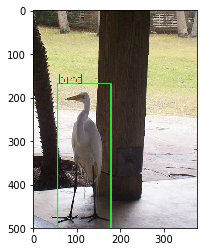

In [25]:
img = mpimg.imread("Demo_image01_result.jpg")
plt.close()
plt.imshow(img)  

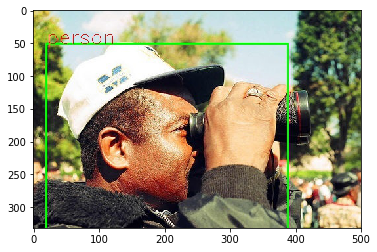

In [27]:
img = mpimg.imread("Demo_image02_result.jpg")
plt.close()
plt.imshow(img)  

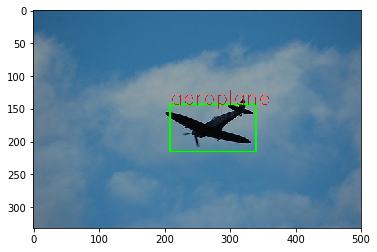

In [28]:
img = mpimg.imread("Demo_image03_result.jpg")
plt.close()
plt.imshow(img)  

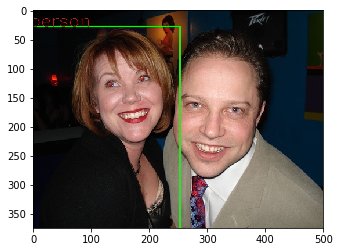

In [29]:
img = mpimg.imread("Demo_image04_result.jpg")
plt.close()
plt.imshow(img)  

As we see for the last image, one of the persons is not detected. This is because we used a Confidence Threshhold of 0.9
If we rerun the detector for the last image using a lower confidence threshold of 0.7 we get the following result.

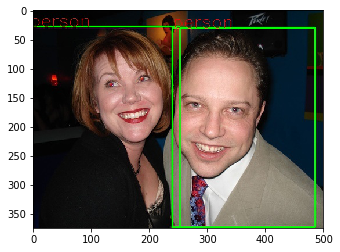

In [4]:
from predict import *
import cv2
image = cv2.imread("Demo_image04.jpg")
image_name = "Demo_image04.jpg"
result = predict_gpu(model,image_name,'',0.7)
for left_up,right_bottom,class_name,_,prob in result:
    cv2.rectangle(image,left_up,right_bottom,(0,255,0),2)
    cv2.putText(image,class_name,left_up,cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),1,2)
#         print(prob)   
cv2.imwrite('Demo_image04_result2'+'.jpg',image)
img = mpimg.imread("Demo_image04_result2.jpg")
plt.close()
plt.imshow(img)  